# Coleta de Dados no MySQL utilizando o Python

#### Para mais detalhes sobre o pacote mysql.connector consulte:
* https://www.w3schools.com/python/python_mysql_getstarted.asp

### OBSERVAÇÃO

#### Antes de executar este notebook pela primeira vez, instale o pacote mysql.connector

Para instalar o pacote, utilizando o prompt do Anaconda, execute o comando abaixo:

#### *conda install -c anaconda mysql-connector-python*

In [ ]:
import mysql.connector

#### Conectar ao MySQL Server sem selecionar um banco de dados

In [ ]:
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='igti'
)

print(mydb)

mycursor = mydb.cursor()

#Para criar um banco de dados use o comando abaixo
#mycursor.execute("CREATE DATABASE mydatabase")


In [ ]:
#Retorna todos os esquemas criados no seu servidor de Banco de Dados
mycursor.execute("SHOW DATABASES") 

for db in mycursor:
    print(db)


#### Conectar ao MySQL Server selecionand um banco de dados específico

In [ ]:

mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='igti',
    database='bootcamp'
)

print(mydb)

mycursor = mydb.cursor()

In [ ]:
#Retorna todas as tabelas criados no seu esquema de Banco de Dados 
mycursor.execute("SHOW TABLES")

for db in mycursor:
    print(db)

In [ ]:
# Inserir dados em uma tabela

query = "INSERT INTO caracteristicasgerais (idcaracteristicasGerais, dsccaracteristicasGerais) VALUES (%s, %s)"
values = (1, "Portaria 24 horas")

mycursor.execute(query, values)

#Fazer a confirmação da inserção
mydb.commit()

print(mycursor.rowcount, "registro(s) inserido(s).")

In [ ]:
#Inserindo multiplos valores
values = [(2, "Elevador"),(3,"Piscina")]

mycursor.executemany(query, values)

mydb.commit()

print(mycursor.rowcount, "registro(s) inserido(s).")

In [ ]:
#Consultar a tabela
mycursor.execute("SELECT * FROM caracteristicasgerais")

myresult = mycursor.fetchall() #todos os registros

for mydata in myresult:
    print(mydata)

In [ ]:
mycursor.execute("SELECT idcaracteristicasGerais, dsccaracteristicasGerais FROM caracteristicasgerais")

myresult = mycursor.fetchone() #apenas primeiro registro

print(myresult)


##### Importar pacote csv

In [ ]:
import csv

In [ ]:
#Leitura de arquivo sem utilizar biblioteca Pandas
# Conferir se seu arquivo foi salvo no caminho abaixo

filename = 'C:\Bootcamp\Datasets\CSV\cidades.csv'

#Abrir arquivo e inserir cada linha do arquivo na tabela cidade

with open(filename, 'r') as incsvfile:
    reader = csv.reader(incsvfile, delimiter=',')
    next(reader, None)  # skip the headers
    for line in reader:       
        mycursor.execute ("INSERT INTO cidade (CodigoCompletoIBGE, CodigoCidadeIBGE,NomeCidade, CodEstadoIBGE)\
                  VALUES (%s, %s, %s, %s)",line)        
mydb.commit()

#db.close()
incsvfile.close() #Fechar arquivo

**OBSERVAÇÃO:**

 Caso o erro abaixo ocorra, em qualquer momento deste notebook, significa que sua conexão com o banco de dados foi fechada, devido ao tempo de *timeout*. Basta executar a conexão novamente e executar os comando em seguida.

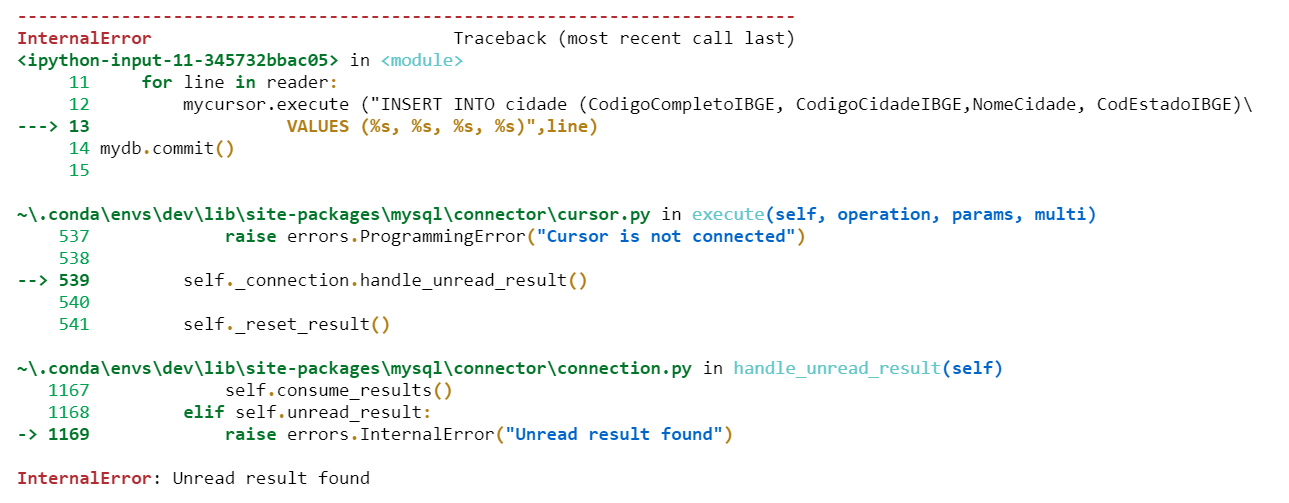

In [ ]:
#Consutar a tabela cidade listando a quantidade de registros existentes nela. Seu resultado deve imprimir 5570.

mycursor.execute("SELECT count(*) FROM cidade")

myresult = mycursor.fetchone()

print(myresult)

In [ ]:
mydb.close() #Fechar o banco de dados

## A partir daqui você deve alterar seu notebook conforme orientações da atividade 10 do enunciado do trabalho prático.

Nas células abaixo foram deixadas algumas dicas para você seguir.

##### 1º) Importar as bibliotecas mysql.connector e csv

In [ ]:
#Se você já importou anteriormente e não resetou seu kernel, não será necessário importar

##### 2º) Fazer a conexão com seu banco de dados

##### 3º) Abrir o arquivo 'caracteristicaImovel.txt' e inserir cada linha lida na tabela 'caracteristicageralimovel'

##### 4º) Fazer a confirmação da inserção (commit)

##### 5º) Conferir se os dados foram incluídos na tabela 

##### 6º) Fechar arquivo e banco de dados